<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile

zip_path = "/content/test_set.zip"  # Change to the correct path
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.testzip()
        print("The ZIP file is valid and not corrupted.")
except zipfile.BadZipFile:
    print("The file is not a valid ZIP file or is corrupted.")


The ZIP file is valid and not corrupted.


In [5]:
import zipfile
import os

zip_path = "/content/test_set.zip"  # Update this if needed
extract_path = "/content/dataset"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

# Verify the extracted files
print("Dataset Folders:", os.listdir(extract_path))


Dataset extracted successfully!
Dataset Folders: ['test_set']


Found 1619 images belonging to 1 classes.
Found 404 images belonging to 1 classes.
Class labels: {'test_set': 0}
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9645 - loss: 0.0598 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 1.0000 - loss: 0.0000e+

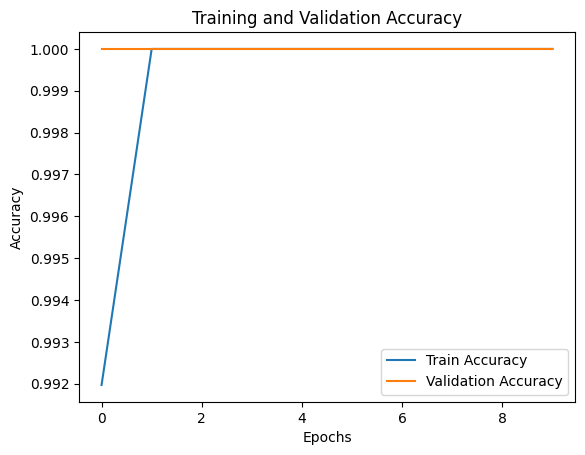

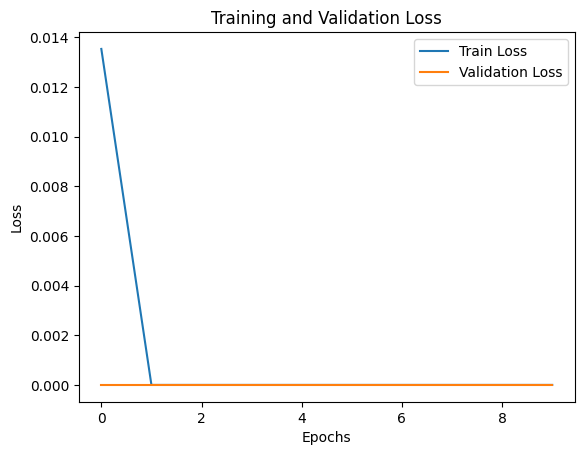

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = 150
BATCH_SIZE = 32

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"  # 80% for training
)

val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"  # 20% for validation
)

print("Class labels:", train_generator.class_indices)  # Should print {'cats': 0, 'dogs': 1'}
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Cats vs Dogs)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()